# 1.1 Método de *bisección*

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_202210/blob/main/1_Ecuaciones_de_una_variable/1.1_Método_biseccion.ipynb)

# Precaución

*Para el correcto desarrollo del notebook, es necesario ejecutar los siguientes fragmentos de código antes de ejecutar las secciónes de práctica.*

In [1]:
import numpy as np
from lib.Equations_one_variable import EquationsOneVariable

#  1.1.1 Marcó Teorico



#  Introducción a ecuaciones de una variable.

Antes de ahondar en el ejercicio de encontra raices *(ceros)* de una función  recordemos como se solucionan algunas funciones polinomiales de una sola variable, Por ejemplo, pensemos en la ecuación cuadratica de la forma clásica:

\begin{equation}
f(x) = ax^2 + bx + c
\end{equation}

Se puede resolver de la forma:

\begin{equation}
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{a^2}
\end{equation}

Y para este escenario en particular encontrar las $x$ en donde $f(x) = 0$ es sencillo, ahora pensemos en funciones mucho más complejas donde encontrar valores de $x$ tales que se cumpla la condición previamente dada seria muy complejo.

Es aqui donde los métodos númericos vienen al rescate, para encontrar las posibles soluciones a ecuaciones del tipo:

\begin{equation}
f(x) = 0
\end{equation}

 Donde $f(x)$ es un polinomio de la forma $f(x) = x^n + a_1x^{n-1} + ... + a_{n-1}x^1 + a_n$

> Recuerda: Encontrar raices o ceros de las funciones es parte fundamental en la practica del desarrollo de actividades relacionadas con ciencia e ingenieria.

Existen diferente métodos que se aplican a diferentes tipos de ecuaciones, y algunos métodos pueden resolver más de un tipo de ecuación.

## 1.1.1.2 Tipos de Métodos
* *Métodos Locales:* estos métodos estan diseñados para buscar una raiz (cero de una función) de ecuaciones no lineales.
* *Métodos Globales:* diseñado para encontrar una raiz a partir de un valor dado arbitario, podrian encontrar más de una raiz.
* *Métodos de Iterativo:* pueden encontrar más de una raiz en un intervalo especifico dado perteneciente a un dominio de $x$. Se caracterizan por ser robustos y lentos.
* *Método Gráfico:* ser caracteriza por ser utilizado a partir de un punto de vista gráfico de $f(x)$, teniendo en cuento un dominio concreto de $x$.


## 1.1.2 Sobre el Método Bisección

El método sirve para encontrar un valor apróximado de $x$  de modo que $f(x) = 0$ y pertenece al tipo de métodos iterativos.

Para que el método biseccion funcione se debe cumplir que:

> Dada una función $f(x)$ y sea continua en un intervalo $[a, b]$ se debe cumplir que $f(a)*f(b) < 0$.

Por el teorema de Bolzano sabemos que: sí la funcion es continua en dicho intervalo luego $f(a)$ y $f(b)$ son de signos opuestos, luego esto implica que entre $a$ y $b$ existe al menos un $c$ tal que $f(c) = 0$. 

Luego el método de bisección toma esto como idea para crear su algoritmo iterativo. 

> $[a, b]$ → R es una función continua y $f(a)*f(b) < 0$, entonces por el teorema del valor
intermedio se conoce que existe al menos una solución de la ecuación f (x) = 0 y es posible aplicar el
siguiente procedimiento, denominado método de bisección, para determinar dicha solución.

### 1.1.2.1 El **método** explicado paso a paso:

**Paso 1:**  Seleccionar un intervalo $[a, b]$ , que encierren la raíz, de forma tal que la función cambie de signo en el intervalo. Esto se verifica comprobando que $f(a)*f(b) < 0$.

**Paso 2:**  Seleccionar un $m$ tal que $m = \frac{a + b}{2}$. Se calcula el punto intermadio del intervalo.

**Paso 3:** Se comprueba que $f(m) = 0$, si lo es, el método finaliza, en caso contrario continua.

**Paso 4**. Realice las siguientes evaluaciones para determinar en qué subintervalo está
la raíz:
  * Sí $f(m) * f(a) < 0$, entonces la raíz se encuentra dentro del subintervalo inferior o izquierdo. Por lo tanto  $a = m$, se mantiene $b$ y vualva al **paso 2**.
  * Sí $f(m) * f(b) > 0$, entonces la raíz se encuentra dentro del subintervalo superior o derecho. Por lo tanto $b = m$, se mantiene $a$ y vualva al **paso 2**.
  * Sí $f(m) * f(a) = 0$, la raíz es igual $a; Termina el cáculo

1. Sí $f(m) \neq0$,  repita el paso 2 al 4 hasta que se logre una tolerancia de error pequeña ó se agoten el número de iteraciones.

### 1.1.2.3 Sobre la tolerancia y la aproximación del error.

Antes de mostar un ejempló sobre el método de bisección se debe abordar la definición de error ya que es de suma importancia para la materia de métodos númericos. Dado que ello depende la aceptación de la solución encontrada.

De los tipos de errores encontrados en métodos númericos serian de dos tipos:

* *Error de truncamiento:* el error que resulta de la solución de un problema por medio de la aproximación en vez de la solución analítica
* *Error de redondeo:* provienen de la representación de números exactos debido a su limitante en las cifras significativas.

Definamos el primero el Valor Verdadero ($V_v$), como:

\begin{equation}
V_v = Aproximación + Tolerancia
\end{equation}

Luego a partir del Valor Verdadero se puede definir el Error Verdadero ($E_v$) como:

\begin{equation}
E_v = V_v - Aproximación\\
\end{equation}

Con el Valor Verdadero y El error verdadero se puede construir el Error Relativo Fraccional: 

\begin{equation}
E_v = \frac{V_v - Aproximacion}{E_v}
\end{equation}

El cual puede ser expresado en forma de porcentaje tal que:

\begin{equation}
E_v = \frac{V_v - Aproximacion}{E_v} * 100 \%
\end{equation}

Y para finalizar, tambien se podria formalizar el error absoluto $|E_v|$ como:

\begin{equation}
|E_v| = V_v - Aproximacion
\end{equation}

**Graficamente de puede interpretar el métdo de Bisección**

<img src="imagenes/mbiseccion.png"/>


# Ejemplo Práctico


Resolver la ecuación $e^x - sin(x) = 3x^2 $

1. Graficar la ecuación en un intervalo a elección, para este caso el intervalo es $[0, 2]$:

**Datos:**

$f(x)$ = $e^x - sin(x) = 3x^2 $

$(a, b)$ = $(0, 2)$

$a$ = $0$

$b$ = $2$

Aproximación = $10^{-5}$

**Procedimiento:**

*Paso 1:* Se recomeinda graficar antes de empezar el calculo

*Paso 2:* Hallar punto medio $m = \frac{a + b}{2}$

*Paso 3:* Evaluar la función $f(a)$,$f(b)$,$f(m)$

*Paso 4:* Determunar el nuevo intervalo

*Paso 5:* Cacular el error  $e = \frac{b + a}{2}$

*Nota:* El procedimiento de los *Pasos del 2 al 5* se realizan ejecutando el *met_biseccion()*

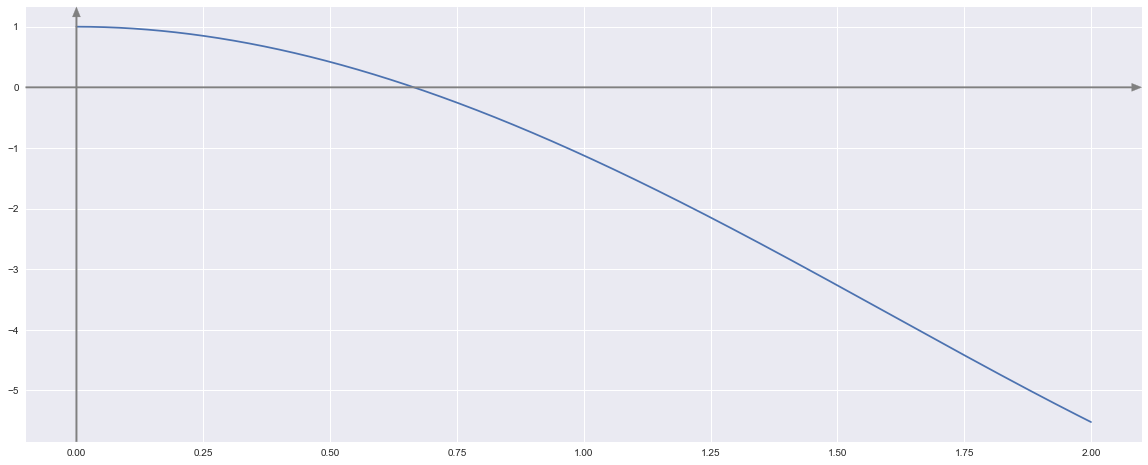

In [3]:
f = lambda x: np.e**x - np.sin(x) - 3*x**2
EquationsOneVariable.graficar(f, 0, 2)

Analizando la gráfica se puede observar que cuando $x = 0.65$ se obtendria que $f(x) = 0$.

2. Ahora se puede ejecutar el método y comprobar la solución encontrada con el análisis gráfico:

In [4]:
EquationsOneVariable.met_biseccion(f, 0, 2, tol=1e-5)

ite 1 : a_0  = 0.0000, b_0  = 2.0000, p_1  = 1.00000 | e_abs: 1.000000e+00
ite 2 : a_1  = 0.0000, b_1  = 1.0000, p_2  = 0.50000 | e_abs: 5.000000e-01
ite 3 : a_2  = 0.5000, b_2  = 1.0000, p_3  = 0.75000 | e_abs: 2.500000e-01
ite 4 : a_3  = 0.5000, b_3  = 0.7500, p_4  = 0.62500 | e_abs: 1.250000e-01
ite 5 : a_4  = 0.6250, b_4  = 0.7500, p_5  = 0.68750 | e_abs: 6.250000e-02
ite 6 : a_5  = 0.6250, b_5  = 0.6875, p_6  = 0.65625 | e_abs: 3.125000e-02
ite 7 : a_6  = 0.6562, b_6  = 0.6875, p_7  = 0.67188 | e_abs: 1.562500e-02
ite 8 : a_7  = 0.6562, b_7  = 0.6719, p_8  = 0.66406 | e_abs: 7.812500e-03
ite 9 : a_8  = 0.6641, b_8  = 0.6719, p_9  = 0.66797 | e_abs: 3.906250e-03
ite 10: a_9  = 0.6641, b_9  = 0.6680, p_10 = 0.66602 | e_abs: 1.953125e-03
ite 11: a_10 = 0.6641, b_10 = 0.6660, p_11 = 0.66504 | e_abs: 9.765625e-04
ite 12: a_11 = 0.6650, b_11 = 0.6660, p_12 = 0.66553 | e_abs: 4.882812e-04
ite 13: a_12 = 0.6650, b_12 = 0.6655, p_13 = 0.66528 | e_abs: 2.441406e-04
ite 14: a_13 = 0.6650, b_

0.6652603149414062

# Ejercicios Prácticos

1.1.3.1 Resolver $e^x - 3 sin (x) = 3x$ con una tolerancia de $10^{-5}$

**Datos:**

$f(x)$ = $e^x - 3 sin (x) = 3x$

$(a, b)$ = $(0, 0.5)$

$a$ = $0$

$b$ = $0.5$

Aproximación = $10^{-5}$

**Procedimiento:**

*Paso 1:* Se recomeinda graficar antes de empezar el calculo

*Paso 2:* Hallar punto medio $m = \frac{a + b}{2}$

*Paso 3:* Evaluar la función $f(a)$,$f(b)$,$f(m)$

*Paso 4:* Determunar el nuevo intervalo

*Paso 5:* Cacular el error  $e = \frac{b + a}{2}$

*Nota:* El procedimiento de los *Pasos del 2 al 5* se realizan ejecutando el *met_biseccion()*

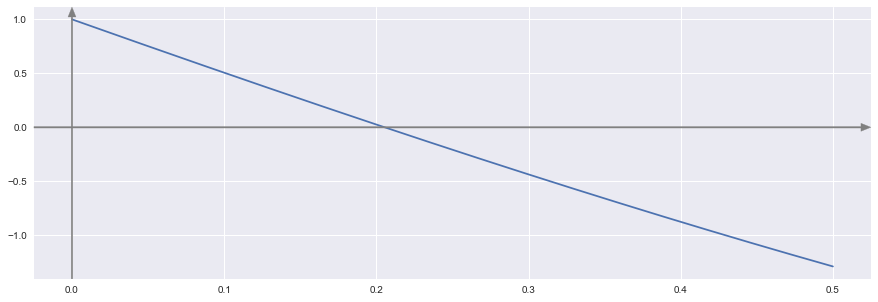

In [4]:
f = lambda x: np.e**x - 3*np.sin(x) - 3*x
# Función que grafica
graficar(f, 0, 0.5)

In [ ]:

met_biseccion(f, 0, 0.5, tol=1e-5)

1.1.3.2 Resolver $tan(x) - x$

In [ ]:
f = lambda x: np.tan(x) - x
met_biseccion(f, 4, 4.5, tol=1e-2)

ite 1 : a_0  = 4.0000, b_0  = 4.5000, p_1  = 4.25000
ite 2 : a_1  = 4.2500, b_1  = 4.5000, p_2  = 4.37500
ite 3 : a_2  = 4.3750, b_2  = 4.5000, p_3  = 4.43750
ite 4 : a_3  = 4.4375, b_3  = 4.5000, p_4  = 4.46875
ite 5 : a_4  = 4.4688, b_4  = 4.5000, p_5  = 4.48438
ite 6 : a_5  = 4.4844, b_5  = 4.5000, p_6  = 4.49219
solución encontrada


4.4921875

1.1.3.3 Resolver $x^{10} - 1$

In [ ]:
f = lambda x: x**10 - 1
met_biseccion(f, 0, 1.2, tol=1e-15, n=500)

ite 1 : a_0  = 0.0000, b_0  = 1.2000, p_1  = 0.60000
ite 2 : a_1  = 0.6000, b_1  = 1.2000, p_2  = 0.90000
ite 3 : a_2  = 0.9000, b_2  = 1.2000, p_3  = 1.05000
ite 4 : a_3  = 0.9000, b_3  = 1.0500, p_4  = 0.97500
ite 5 : a_4  = 0.9750, b_4  = 1.0500, p_5  = 1.01250
ite 6 : a_5  = 0.9750, b_5  = 1.0125, p_6  = 0.99375
ite 7 : a_6  = 0.9937, b_6  = 1.0125, p_7  = 1.00312
ite 8 : a_7  = 0.9937, b_7  = 1.0031, p_8  = 0.99844
ite 9 : a_8  = 0.9984, b_8  = 1.0031, p_9  = 1.00078
ite 10: a_9  = 0.9984, b_9  = 1.0008, p_10 = 0.99961
ite 11: a_10 = 0.9996, b_10 = 1.0008, p_11 = 1.00020
ite 12: a_11 = 0.9996, b_11 = 1.0002, p_12 = 0.99990
ite 13: a_12 = 0.9999, b_12 = 1.0002, p_13 = 1.00005
ite 14: a_13 = 0.9999, b_13 = 1.0000, p_14 = 0.99998
ite 15: a_14 = 1.0000, b_14 = 1.0000, p_15 = 1.00001
ite 16: a_15 = 1.0000, b_15 = 1.0000, p_16 = 0.99999
ite 17: a_16 = 1.0000, b_16 = 1.0000, p_17 = 1.00000
ite 18: a_17 = 1.0000, b_17 = 1.0000, p_18 = 1.00000
ite 19: a_18 = 1.0000, b_18 = 1.0000, p_19 = 1

0.9999999999999994